# Exploratory Data Analysis on IPL Data
<img src="https://www.larutadelsorigens.cat/filelook/full/119/1191765/rcb-hd-wallpapers-free-download.jpg" height='400px' width='100%'><br/>

## 1. Problem Statement
  ### - 1.1 Introduction
  ### - 1.2 Bussiness Goal
## 2. Importing Packages
## 3. Loading Data
  ### - 3.1 Importing Data
  ### - 3.2 Description of the Datasets
  
## 4. Data Processing
  ### - 4.1 Pandas Profiling before Data Preprocessing
  ### - 4.2 Filling missing values or outliers in each column
  ### - 4.3 Pandas Profiling after Data Preprocessing
## 5. Exploratory Data Analysis
  
## 6. Conclusion
 ### - 6.1 Actionable Insights

## 1.Problem Statement
    
    All Indian Premier League Cricket matches data between 2008 and 2018. Data contains details related to the match such as location, contesting teams, umpires, results, etc.

### 1.1 Introduction
This Exploratory Data Analysis on IPL data to analyze how each team is performing over the years. Here we will try to answer,

1. What are their positives and negatives so far ?
2. What should they focus on more ?
3. what should they be proud of ?

### 1.2  Bussiness Goal
  
    To win next IPL title.

# 2. Importing Packages

In [1]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.get_option("display.max_rows",10000)
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

In [3]:
# Install and update plotly using this command to the latest version (higher than version 4.0.0)

!pip install plotly --upgrade

  ERROR: Could not find a version that satisfies the requirement plotly (from versions: none)
ERROR: No matching distribution found for plotly


# 3. Loading Data

## 3.1 Importing Data

In [3]:
#We are using IPL data

#importing CSV file from github repository
df_ipl_data = pd.read_csv('matches.csv')

In [4]:
# getting top 5 values of dataset
df_ipl_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


## 3.2 Description of data sets

In [6]:
df_ipl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 18 columns):
id                 696 non-null int64
season             696 non-null int64
city               689 non-null object
date               696 non-null object
team1              696 non-null object
team2              696 non-null object
toss_winner        696 non-null object
toss_decision      696 non-null object
result             696 non-null object
dl_applied         696 non-null int64
winner             693 non-null object
win_by_runs        696 non-null int64
win_by_wickets     696 non-null int64
player_of_match    693 non-null object
venue              696 non-null object
umpire1            695 non-null object
umpire2            695 non-null object
umpire3            60 non-null object
dtypes: int64(5), object(13)
memory usage: 98.0+ KB


In [7]:
df_ipl_data.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,696.000000,696.000000,696.000000,696.000000,696.000000
mean,974.103448,2012.965517,0.027299,13.472701,3.349138
std,2143.239623,3.069266,0.163070,23.607994,3.411398
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,174.750000,2010.000000,0.000000,0.000000,0.000000
50%,348.500000,2013.000000,0.000000,0.000000,3.000000
75%,522.250000,2016.000000,0.000000,19.000000,6.000000
max,7953.000000,2018.000000,1.000000,146.000000,10.000000


# 4. Data Processing

## 4.1 Pandas Profiling before Data Preprocessing

In [ ]:
# To install pandas profiling please run this command.

!pip install pandas-profiling --upgrade

In [ ]:
import pandas_profiling 

In [ ]:
# Running pandas profiling to get better understanding of data
df_ipl_data.profile_report(title='Pandas Profiling before Data Preprocessing', style={'full_width':True})

**Observations:**

**1.** From above we can that we have missing values in **city, umpire1, umpire2, umpire3** colums.

## 4.2 Filling missing values in each column

### 4.2.1 City 

We can calculate missing **city** values from **venue** value.

In [8]:
# Map to link venue to city

CITY_VENUE_MAP = {  
   'Dubai International Cricket Stadium':'Dubai',
   'Rajiv Gandhi International Stadium, Uppal':'Hyderabad',
   'Maharashtra Cricket Association Stadium':'Pune',
   'Saurashtra Cricket Association Stadium':'Rajkot',
   'Holkar Cricket Stadium':'Indore',
   'M Chinnaswamy Stadium':'Bengaluru',
   'Wankhede Stadium':'Mumbai',
   'Eden Gardens':'Kolkata',
   'Feroz Shah Kotla':'Delhi',
   'Punjab Cricket Association IS Bindra Stadium, Mohali':'Chandigarh',
   'Green Park':'Kanpur',
   'Punjab Cricket Association Stadium, Mohali':'Chandigarh ',
   'Sawai Mansingh Stadium':'Jaipur',
   'MA Chidambaram Stadium, Chepauk':'Chennai',
   'Dr DY Patil Sports Academy':'Mumbai',
   'Newlands':'Cape Town',
   "St George's Park":'Port Elizabeth',
   'Kingsmead':'Durban',
   'SuperSport Park':'Centurion',
   'Buffalo Park':'East London',
   'New Wanderers Stadium':'Johannesburg',
   'De Beers Diamond Oval':'Kimberley',
   'OUTsurance Oval':'Bloemfontein',
   'Brabourne Stadium':'Mumbai',
   'Sardar Patel Stadium, Motera':'Ahmedabad',
   'Barabati Stadium':'Cuttack',
   'Vidarbha Cricket Association Stadium, Jamtha':'Nagpur',
   'Himachal Pradesh Cricket Association Stadium':'Dharamsala',
   'Nehru Stadium':'Kochi',
   'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium':'Visakhapatnam',
   'Subrata Roy Sahara Stadium':'Pune',
   'Shaheed Veer Narayan Singh International Stadium':'Raipur',
   'JSCA International Stadium Complex':'Ranchi',
   'Sheikh Zayed Stadium':'Abu Dhabi',
   'Sharjah Cricket Stadium':'Sharjah'
}


In [9]:
# We are calculating all city values from venue. 
# There may be better way. Instead of replacing every city value, we can replace fill missing values. 
# If anyone knows the answer please help. 

df_ipl_data['city'] = df_ipl_data['venue'].map(CITY_VENUE_MAP)

In [ ]:
df_ipl_data[df_ipl_data['city'].isnull()]

### 4.2.2 Umpire 

Fill missing **umpire3** value with mode

In [ ]:
mode_umpire3 = df_ipl_data['umpire3'].mode()[0]

In [ ]:
df_ipl_data['umpire3'].fillna(mode_umpire3, inplace=True)


Fill missing **umpire2** value with mode

In [ ]:
mode_umpire2 = df_ipl_data['umpire2'].mode()[0]
df_ipl_data['umpire2'].fillna(mode_umpire2, inplace=True)

Fill missing **umpire1** value with mode

In [ ]:
mode_umpire1 = df_ipl_data['umpire1'].mode()[0]
df_ipl_data['umpire1'].fillna(mode_umpire1, inplace=True)

## 4.3 Pandas Profiling after Data Preprocessing

In [ ]:
# Running pandas profiling again to check all missing values are filled properly
df_ipl_data.profile_report(title='Pandas Profiling after Data Preprocessing', style={'full_width':True})

**Observations**:

We can observe all missing values are filled properly

# 5. Exploratory Data Analysis

## 5.1 Importance of Toss

### 5.1.1 How teams winning the toss performing overall ?

In [ ]:
win_count = df_ipl_data[df_ipl_data['winner'] == df_ipl_data['toss_winner']]['winner'].count()

print('Numbers of matches won by toss winning team : {}'.format(win_count))

In [ ]:
toss_loss_count = df_ipl_data[df_ipl_data['winner'] != df_ipl_data['toss_winner']]['winner'].count()
print('Numbers of matches won by toss losing team : {}'.format(toss_loss_count))

**Observation** : We can observe that team winning toss has **51.51%** chances of winning.

### 5.1.2 How teams winning the toss performing(season-wise) ?

In [ ]:
season_win_count = df_ipl_data[df_ipl_data['winner'] == df_ipl_data['toss_winner']]['season'].value_counts(sort=False)
print('Numbers of matches won by toss winning team(season-wise):')
print(season_win_count)

In [ ]:
season_lose_count = df_ipl_data[df_ipl_data['winner'] != df_ipl_data['toss_winner']]['season'].value_counts(sort=False)
print('Numbers of matches won by toss losing team(season-wise):')
print(season_lose_count)

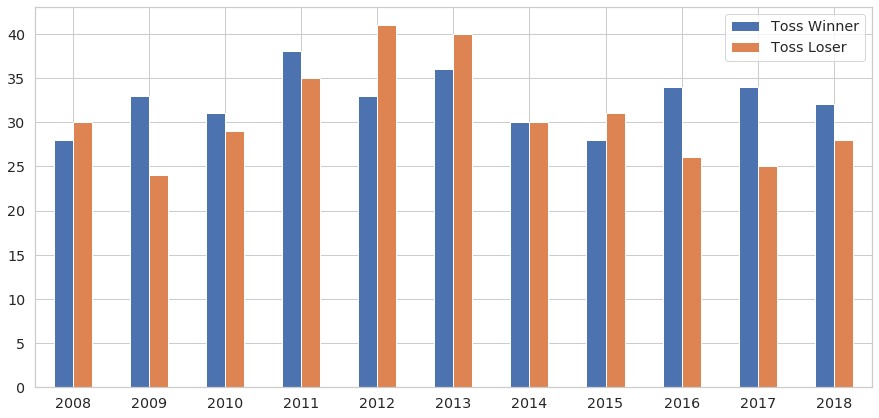

In [10]:
df = pd.DataFrame(
	{
	'Toss Winner': df_ipl_data[df_ipl_data['winner'] == df_ipl_data['toss_winner']]['season'].value_counts(sort=False),
  'Toss Loser': df_ipl_data[df_ipl_data['winner'] != df_ipl_data['toss_winner']]['season'].value_counts(sort=False)
	}
	) 
df.plot.bar(rot=0,figsize=(15, 7))

**Obsevations:**

**1.**Teams winning toss won more matches in **6 out of 10 seasons**(in 2014 the count is same) i.e probability of team winning after toss winning is **60%(season-wise).**


### 5.1.3 How teams winning the toss performing(team-wise) ?

In [ ]:
team_win_count = df_ipl_data[df_ipl_data['winner'] == df_ipl_data['toss_winner']]['team1'].value_counts()
print('Numbers of matches won by toss winning team(team-wise):')
print(team_win_count)


In [ ]:
team_lose_count = df_ipl_data[df_ipl_data['winner'] != df_ipl_data['toss_winner']]['team1'].value_counts()
print('Numbers of matches won by toss losing team(team-wise):')
print(team_lose_count)

In [ ]:
#df_ipl_data.groupby('team2')[df_ipl_data['winner'] == df_ipl_data['team1']].count()

In [ ]:
df = pd.DataFrame(
	{
	'Toss Winner': df_ipl_data[df_ipl_data['winner'] == df_ipl_data['toss_winner']]['team1'].value_counts(sort=False),
  'Toss Loser': df_ipl_data[df_ipl_data['winner'] != df_ipl_data['toss_winner']]['team1'].value_counts(sort=False)
	}
	) 
df.plot.bar(rot=0,figsize=(32, 7))

Observations:

1. 14 teams have played IPL so far.
2. **8 out of 14 teams** won more matches if they win toss i.e, **57%** more chance.

### 5.1.4 How teams are performing at toss(team-wise) ?

In [ ]:
team_win_count = df_ipl_data[df_ipl_data['team1'] == df_ipl_data['toss_winner']]['team1'].value_counts().iloc[:]
print('Numbers of tosses won by each team:')
print(team_win_count)

In [ ]:
team_win_count = df_ipl_data[df_ipl_data['team1'] != df_ipl_data['toss_winner']]['team1'].value_counts().iloc[:]
print('Numbers of tosses lost by each team:')
print(team_win_count)

In [ ]:
df = pd.DataFrame(
	{
	'Toss Winner': df_ipl_data[df_ipl_data['team1'] == df_ipl_data['toss_winner']]['team1'].value_counts().iloc[:],
  'Toss Loser': df_ipl_data[df_ipl_data['team1'] != df_ipl_data['toss_winner']]['team1'].value_counts().iloc[:]
	}
	) 
df.plot.bar(rot=0,figsize=(32, 7))

**Observations:**

We can observe **Chennai Super Kings** it the only team which has uper hand at toss.

## 5.2 Importance of toss decision

### 5.2.1 Should we bat or field after winning toss(Over all) ?

In [31]:
toss_win_field_count = df_ipl_data[

(df_ipl_data['winner'] == df_ipl_data['toss_winner']) & (df_ipl_data['toss_decision'] == 'field') 

]['winner'].count()

print('Numbers of matches won by fielding team after winning toss(Over all):')
print(toss_win_field_count)

Numbers of matches won by fielding team after winning toss(Over all):
228


In [32]:
toss_win_bat_count = df_ipl_data[

(df_ipl_data['winner'] == df_ipl_data['toss_winner']) & (df_ipl_data['toss_decision'] == 'bat') 

]['winner'].count()

print('Numbers of matches won by batting team after winning toss(Over all):')
print(toss_win_bat_count)

Numbers of matches won by batting team after winning toss(Over all):
129


**Observation:**

We can observe that team choosing **fielding** after **winning toss** has winning percentage of **32.9%** where as team choosing **batting** after **winning toss** has winning percentage of **18.6%**

### 5.2.2 Should we bat or field after winning toss(season-wise) ?

In [ ]:
toss_win_field_count = df_ipl_data[

(df_ipl_data['winner'] == df_ipl_data['toss_winner']) & (df_ipl_data['toss_decision'] == 'field') 

]['season'].value_counts(sort=False)

print('Numbers of matches won by fielding team after winning toss(season-wise):')
print(toss_win_field_count)

In [ ]:
toss_win_bat_count = df_ipl_data[

            (df_ipl_data['winner'] == df_ipl_data['toss_winner']) & (df_ipl_data['toss_decision'] == 'bat') 
    
]['season'].value_counts(sort=False)

print('Numbers of matches won by batting team after winning toss(season-wise):')
print(toss_win_bat_count)

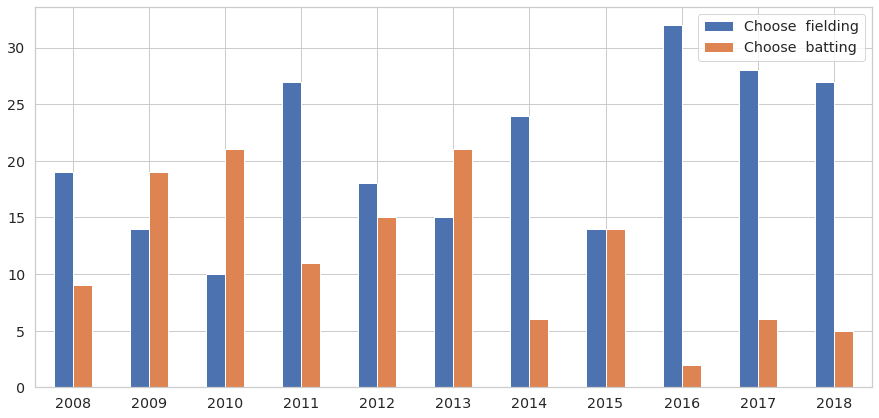

In [33]:
df = pd.DataFrame(
	{
	'Choose  fielding': df_ipl_data[

                                (df_ipl_data['winner'] == df_ipl_data['toss_winner']) & (df_ipl_data['toss_decision'] == 'field') 

                                ]['season'].value_counts(),
  'Choose  batting': df_ipl_data[
                                (df_ipl_data['winner'] == df_ipl_data['toss_winner']) & (df_ipl_data['toss_decision'] == 'bat') 
                                ]['season'].value_counts()
	}
	) 
df.plot.bar(rot=0,figsize=(15, 7))

**Observations:**

**1.** We can clearly observe that **7 out 10 seasons** matches are won by team that choose fielding after winning toss i.e, **70%** probability

**2.** In **last 3 seasons**, we can see more than **82% matches** are won by fielding team after winning toss.

### 5.2.3 Should we bat or field after winning toss(team-wise) ?

In [ ]:
 toss_win_field_count = df_ipl_data[

            (df_ipl_data['winner'] == df_ipl_data['toss_winner']) & (df_ipl_data['toss_decision'] == 'field') 

            ]['team1'].value_counts()
print('Numbers of matches won by fielding team after winning toss(team-wise):')
print(toss_win_field_count)

In [ ]:
toss_win_bat_count = df_ipl_data[

            (df_ipl_data['winner'] == df_ipl_data['toss_winner']) & (df_ipl_data['toss_decision'] == 'bat') 

            ]['team1'].value_counts()
print('Numbers of matches won by batting team after winning toss(team-wise):')
print(toss_win_bat_count)

In [ ]:
df = pd.DataFrame(
	{
	'Choose  fielding': df_ipl_data[

                                (df_ipl_data['winner'] == df_ipl_data['toss_winner']) & (df_ipl_data['toss_decision'] == 'field') 

                                ]['team1'].value_counts(),
  'Choose  batting': df_ipl_data[
                                (df_ipl_data['winner'] == df_ipl_data['toss_winner']) & (df_ipl_data['toss_decision'] == 'bat') 
                                ]['team1'].value_counts()
	}
	) 
df.plot.bar(rot=0,figsize=(32, 7))

**Observations:**

**1.** **10 out of 14 teams** won by choosing fielding after winning toss i.e, **71.4%.**

**2.** Interestingly, Gujarat Lions, Kochi Tuskers Kerela, Rising Pune Supergiant, Rising Pune Supergiants never won by choosing batting after winning toss.

## 5.3 Home advantage

**NOTE:** 

**1.** We are excluding results of 2009 season as 2009 IPL is not conducted in india(so, no concept of home advantage)

**2.** We can observe that **team1 home ground is always venue of the match**.

### 5.3.1 Do teams take home advantage(over-all)?

In [ ]:
total_no_of_matches = df_ipl_data[(df_ipl_data['season'] != 2009)]['id'].count()

print('Numbers of matches played in india(over-all):')
print(total_no_of_matches)

In [ ]:
win_home_team = df_ipl_data[((df_ipl_data['winner']== df_ipl_data['team1']) & (df_ipl_data['season'] != 2009))]['winner'].count()

print('Numbers of matches won by home team(over-all):')
print(win_home_team)

In [ ]:
win_visiting_team= df_ipl_data[((df_ipl_data['winner']!= df_ipl_data['team1']) & (df_ipl_data['season'] != 2009))]['winner'].count()

print('Numbers of matches won by visiting team(over-all):')
print(win_visiting_team)

**Observations:**

**1.** We can clearly observe that teams are failing to take home advantage.

**2.** Only **44.6%** matches are won by home team.

### 5.3.2 Do teams take home advantage(season-wise)?

In [ ]:
win_home_team = df_ipl_data[((df_ipl_data['winner']== df_ipl_data['team1']) & (df_ipl_data['season'] != 2009))]['season'].value_counts(sort=False)

print('Numbers of matches won by home team(season-wise):')
print(win_home_team)

In [ ]:
win_visiting_team = df_ipl_data[(df_ipl_data['winner'] != df_ipl_data['team1']) & (df_ipl_data['season'] != 2009)]['season'].value_counts(sort=False)
print('Numbers of matches won by visiting team(over-all):')
print(win_visiting_team)

In [ ]:
df = pd.DataFrame({'win': df_ipl_data[((df_ipl_data['winner']== df_ipl_data['team1']) & (df_ipl_data['season'] != 2009))]['season'].value_counts(sort=False),
                   'loss': df_ipl_data[(df_ipl_data['winner'] != df_ipl_data['team1']) & (df_ipl_data['season'] != 2009)]['season'].value_counts(sort=False)}) 
df.plot.bar(rot=0,figsize=(15, 7))

**Observations:**

Only in **2 out of 11 seasons**, home team could exploit its home conditions

### 5.3.3 Do teams take home advantage(team-wise)?

In [ ]:
win_home_team = df_ipl_data[((df_ipl_data['winner']== df_ipl_data['team1']) & (df_ipl_data['season'] != 2009))]['team1'].value_counts(sort=False)
print('Numbers of matches won by home team(team-wise):')
print(win_home_team)

In [ ]:
win_visiting_team = df_ipl_data[(df_ipl_data['winner'] != df_ipl_data['team1']) & (df_ipl_data['season'] != 2009)]['team1'].value_counts(sort=False)
print('Numbers of matches won by visiting team(over-all):')
print(win_visiting_team)


In [ ]:
df = pd.DataFrame({'Home Wins': df_ipl_data[((df_ipl_data['winner']== df_ipl_data['team1']) & (df_ipl_data['season'] != 2009))]['team1'].value_counts(sort=False),
                   'Away Wins': df_ipl_data[(df_ipl_data['winner'] != df_ipl_data['team1']) & (df_ipl_data['season'] != 2009)]['team1'].value_counts(sort=False)}) 
df.plot.bar(rot=0,figsize=(32, 7))

**Observations:**

**1.** Only **Chennai Super Kings, Mumbai Indians and Sunrisers Hyderabad** are using home conditions to their advantage.

## 5.4 Duckworth-lewis impact

### 5.4.1 How Duckworth-lewis affected teams(over-all)?

**In how many matches DLS is applied?**

In [ ]:
df_ipl_data[df_ipl_data['dl_applied'] == 1]['id'].count()

**In how many many matches team batting first won?**

In [ ]:
df_ipl_data[
(
  (df_ipl_data['team1'] != df_ipl_data['toss_winner']) & (df_ipl_data['toss_decision'] == 'field') | 
  (df_ipl_data['team1'] == df_ipl_data['toss_winner']) & (df_ipl_data['toss_decision'] == 'bat')
) & 
(df_ipl_data['dl_applied'] == 1)
]['winner'].count()

**In how many many matches team batting second won?**

In [ ]:
df_ipl_data[
(
	(df_ipl_data['team1'] == df_ipl_data['toss_winner']) & (df_ipl_data['toss_decision'] == 'field') | 
	(df_ipl_data['team1'] != df_ipl_data['toss_winner']) & (df_ipl_data['toss_decision'] == 'bat')
) & 
	( df_ipl_data['dl_applied'] == 1)
]['winner'].count()

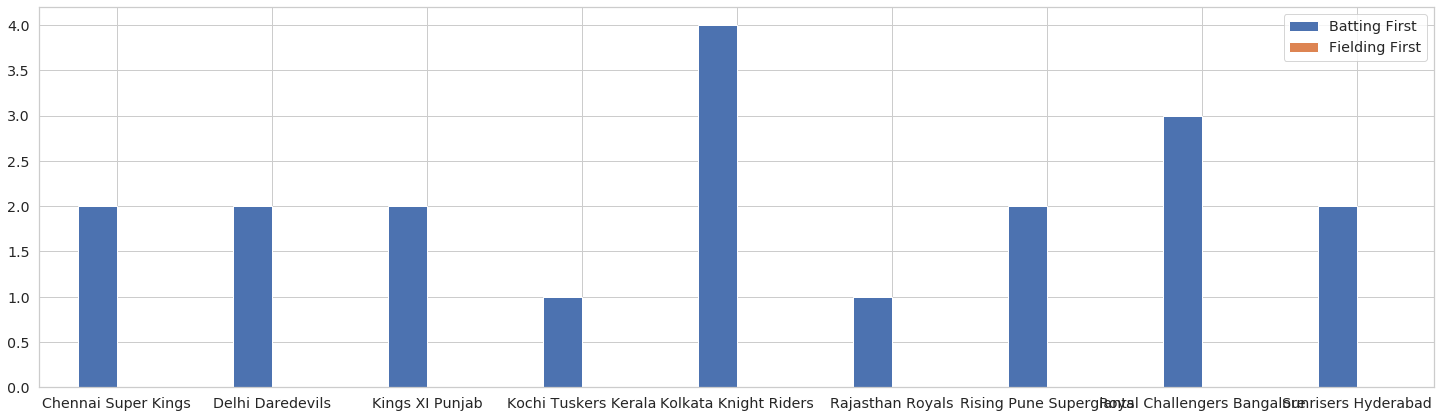

In [11]:
df = pd.DataFrame({
    'Batting First': df_ipl_data[
(
  (df_ipl_data['team1'] != df_ipl_data['toss_winner']) & (df_ipl_data['toss_decision'] == 'field') | 
  (df_ipl_data['team1'] == df_ipl_data['toss_winner']) & (df_ipl_data['toss_decision'] == 'bat')
) & 
(df_ipl_data['dl_applied'] == 1)
]['winner'].value_counts(sort=False),
    
    'Fielding First': df_ipl_data[
(
	(df_ipl_data['team1'] == df_ipl_data['toss_winner']) & (df_ipl_data['toss_decision'] == 'field') | 
	(df_ipl_data['team1'] != df_ipl_data['toss_winner']) & (df_ipl_data['toss_decision'] == 'bat')
) & 
	( df_ipl_data['dl_applied'] == 1)
]['winner'].value_counts(sort=False)

                 }) 
df.plot.bar(rot=0,figsize=(25,7))

**Observation:**

We can observed **team batting first always won** when DLS is applied.

## 5.5 Man Of Match Awards

### 5.5.1 Top 10 players with most Man Of The Match Awards(over-all).

In [ ]:
df_ipl_data['player_of_match'].value_counts().head(10)

In [ ]:
df = pd.DataFrame({'MOM Awards': df_ipl_data['player_of_match'].value_counts().head(20)}) 
df.plot.bar(rot=0,figsize=(25,7))

### 5.5.2 Player with most Man Of Match Awards in one season

#### 2008 - 2013

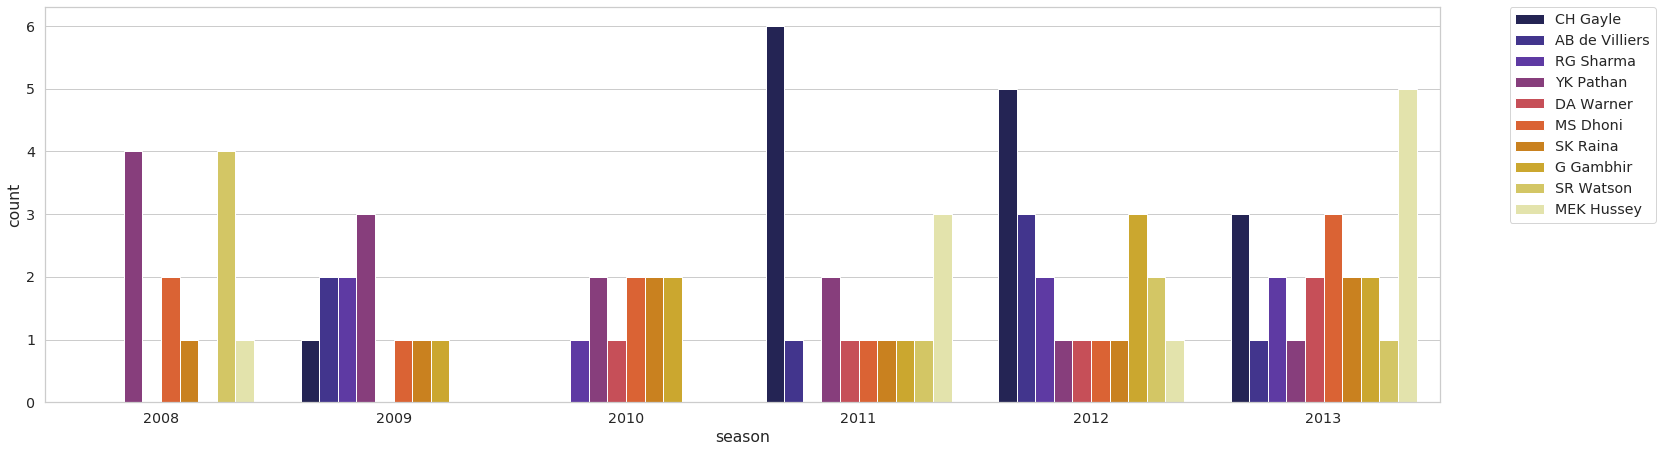

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 7.27)
sns.countplot(x='season',data=df_ipl_data,hue='player_of_match',palette='CMRmap', 
              order=df_ipl_data.season.value_counts(sort=False).iloc[0:6].index, 
              hue_order=df_ipl_data.player_of_match.value_counts(sort=True, ascending=False).iloc[:10].index)

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### 2014 - 2018

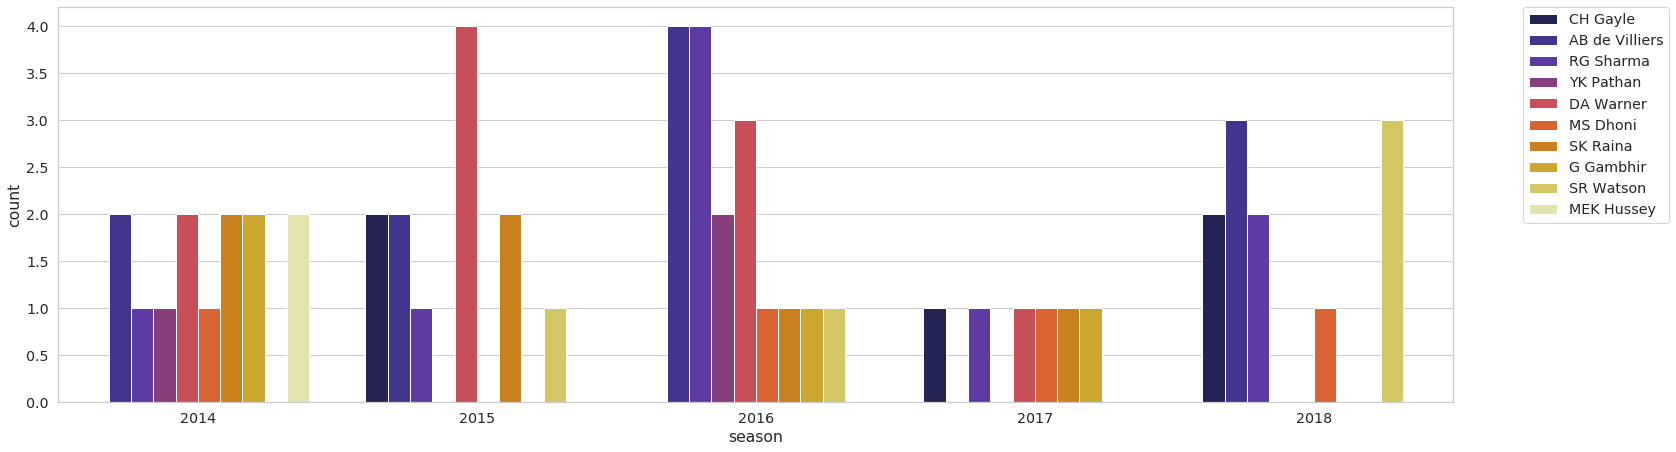

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 7.27)
sns.countplot(x='season',data=df_ipl_data,hue='player_of_match',palette='CMRmap', 
              order=df_ipl_data.season.value_counts(sort=False).iloc[6:11].index, 
              hue_order=df_ipl_data.player_of_match.value_counts(sort=True, ascending=False).iloc[:10].index)

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
df_ipl_data.groupby('season')['player_of_match'].value_counts()

## 5.6  At particular venue should we bat or bowl after winning toss?

In [14]:
df_ipl_data[(df_ipl_data['win_by_runs'] > 0) & (df_ipl_data['season'] != 2009)]['city'].value_counts()

Mumbai           46
Delhi            33
Chennai          30
Bengaluru        30
Kolkata          29
Hyderabad        23
Pune             18
Chandigarh       15
Jaipur           14
Visakhapatnam    7 
Chandigarh       7 
Ahmedabad        6 
Dharamsala       5 
Cuttack          4 
Dubai            3 
Kochi            3 
Abu Dhabi        3 
Rajkot           3 
Sharjah          2 
Ranchi           2 
Nagpur           2 
Raipur           2 
Indore           1 
Name: city, dtype: int64

In [15]:
df_ipl_data[(df_ipl_data['win_by_wickets'] > 0) & (df_ipl_data['season'] != 2009)]['city'].value_counts()

Mumbai           48
Kolkata          41
Bengaluru        40
Delhi            33
Hyderabad        32
Jaipur           26
Chandigarh       20
Pune             20
Chennai          18
Indore           8 
Chandigarh       7 
Rajkot           6 
Ranchi           5 
Ahmedabad        5 
Kanpur           4 
Raipur           4 
Dharamsala       4 
Sharjah          4 
Visakhapatnam    4 
Dubai            4 
Cuttack          3 
Abu Dhabi        3 
Kochi            2 
Nagpur           1 
Name: city, dtype: int64

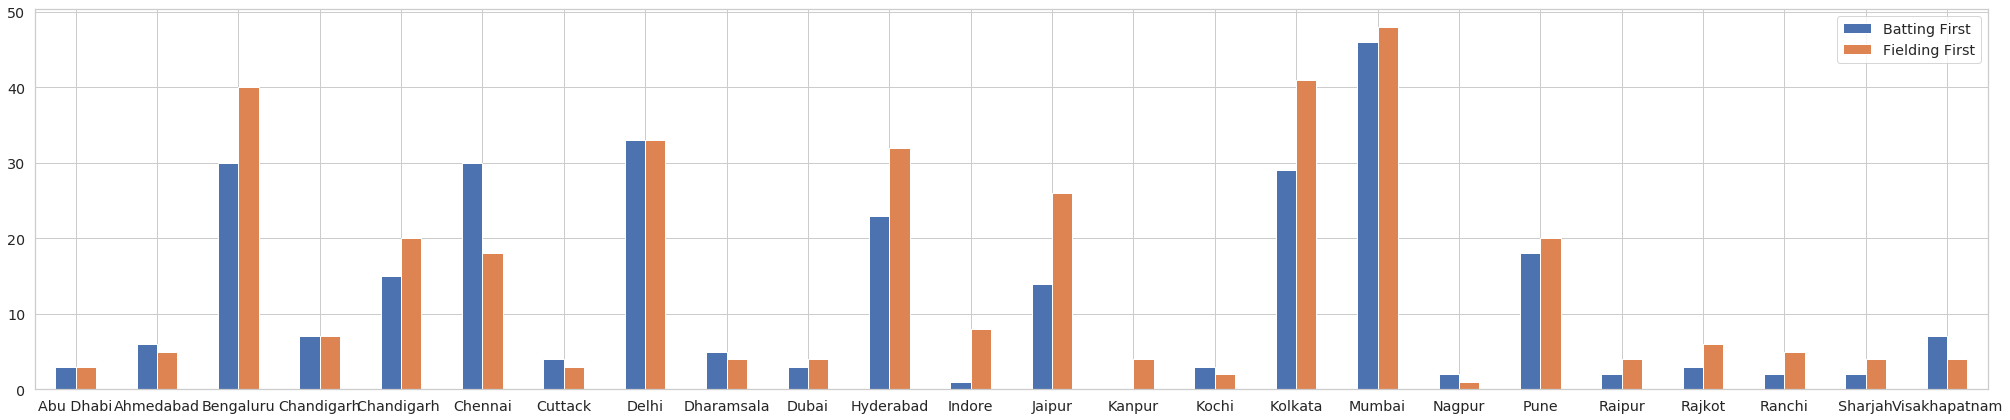

In [16]:
df = pd.DataFrame({'Batting First': df_ipl_data[(df_ipl_data['win_by_runs'] > 0) & (df_ipl_data['season'] != 2009)]['city'].value_counts(sort=False),
                   'Fielding First': df_ipl_data[(df_ipl_data['win_by_wickets'] > 0) & (df_ipl_data['season'] != 2009)]['city'].value_counts(sort=False)}) 
df.plot.bar(rot=0,figsize=(35, 7))

**Observations:**

Only 7 out of 19 cities favour batting first.

## 5.7 Which city is favouring which team?

In [17]:
cities = df_ipl_data['city'].unique()
city_team_map = {}
for c in cities:
  team_modes = df_ipl_data[df_ipl_data['city'] == c]['winner'].mode()
  teams = list()
  for i in range(0,len(team_modes)):
    teams.append(team_modes[i])
  
  city_team_map[c] = teams
  
city_team_map

{'Hyderabad': ['Sunrisers Hyderabad'],
 'Pune': ['Chennai Super Kings', 'Kolkata Knight Riders'],
 'Rajkot': ['Gujarat Lions'],
 'Indore': ['Kings XI Punjab'],
 'Bengaluru': ['Royal Challengers Bangalore'],
 'Mumbai': ['Mumbai Indians'],
 'Kolkata': ['Kolkata Knight Riders'],
 'Delhi': ['Delhi Daredevils'],
 'Chandigarh': ['Kings XI Punjab'],
 'Kanpur': ['Gujarat Lions'],
 'Chandigarh ': ['Kings XI Punjab'],
 'Jaipur': ['Rajasthan Royals'],
 'Chennai': ['Chennai Super Kings'],
 'Cape Town': ['Deccan Chargers'],
 'Port Elizabeth': ['Chennai Super Kings', 'Mumbai Indians'],
 'Durban': ['Delhi Daredevils', 'Royal Challengers Bangalore'],
 'Centurion': ['Chennai Super Kings',
  'Deccan Chargers',
  'Delhi Daredevils',
  'Rajasthan Royals',
  'Royal Challengers Bangalore'],
 'East London': ['Chennai Super Kings', 'Delhi Daredevils', 'Mumbai Indians'],
 'Johannesburg': ['Royal Challengers Bangalore'],
 'Kimberley': ['Chennai Super Kings', 'Deccan Chargers', 'Kings XI Punjab'],
 'Bloemfontein

In [18]:
df_ipl_data.groupby('city')['winner'].value_counts()

city           winner                 
Abu Dhabi      Rajasthan Royals           3
               Kings XI Punjab            2
               Chennai Super Kings        1
               Kolkata Knight Riders      1
Ahmedabad      Rajasthan Royals           7
                                         ..
Visakhapatnam  Rising Pune Supergiants    2
               Chennai Super Kings        1
               Delhi Daredevils           1
               Kings XI Punjab            1
               Rajasthan Royals           1
Name: winner, Length: 205, dtype: int64

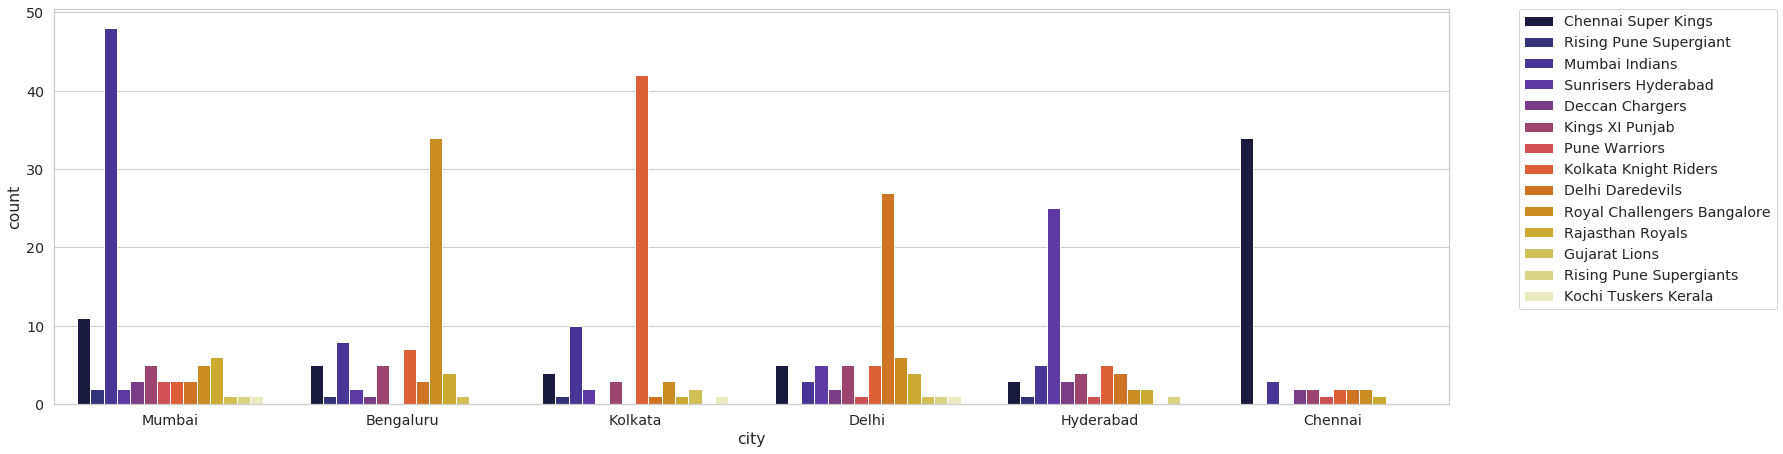

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 7.27)
sns.countplot(x='city',data=df_ipl_data[df_ipl_data['season'] != 2009],hue='winner',palette='CMRmap', 
              order=df_ipl_data.city.value_counts(sort=True).iloc[:6].index, 
              hue_order=df_ipl_data.team1.value_counts(sort=False, ascending=False).iloc[:14].index)

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


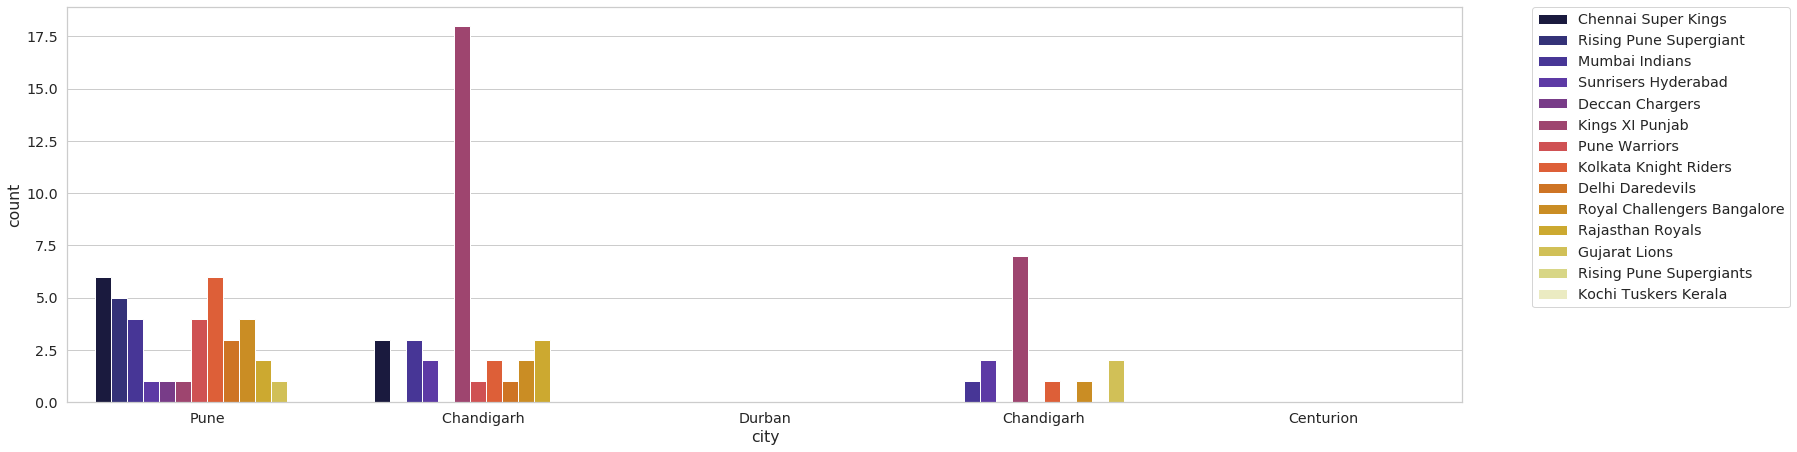

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 7.27)
sns.countplot(x='city',data=df_ipl_data[df_ipl_data['season'] != 2009],hue='winner',palette='CMRmap', 
              order=df_ipl_data.city.value_counts(sort=True).iloc[7:12].index, 
              hue_order=df_ipl_data.team1.value_counts(sort=False, ascending=False).iloc[:14].index)

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

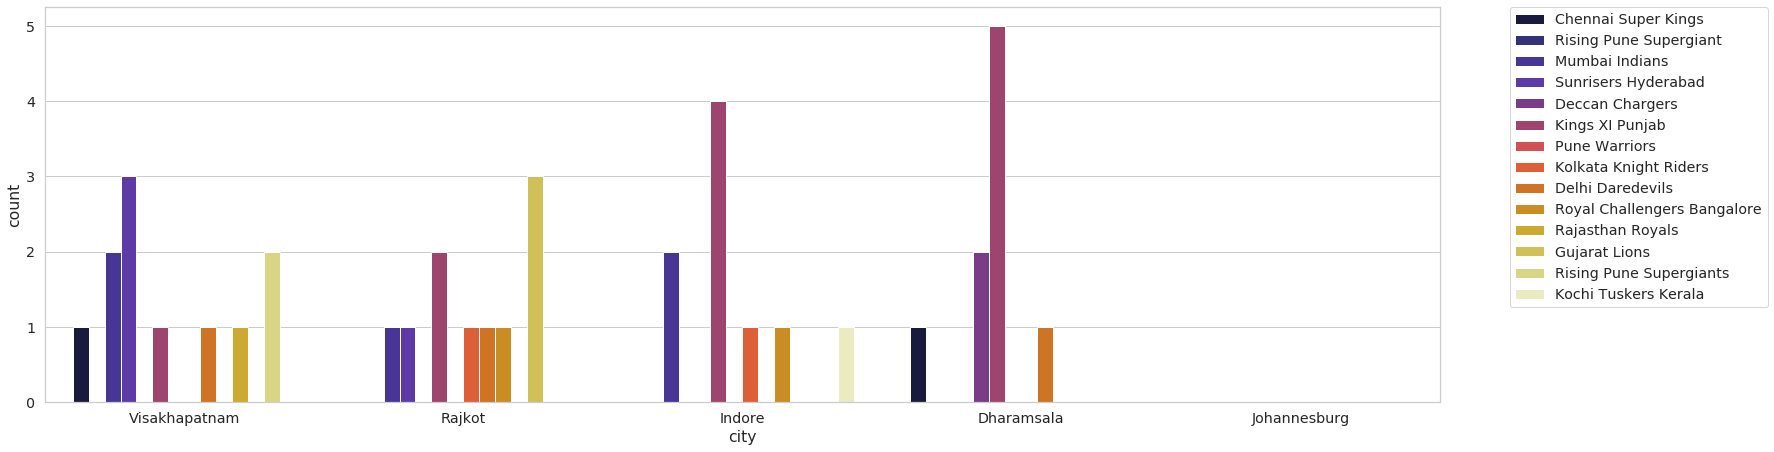

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 7.27)
sns.countplot(x='city',data=df_ipl_data[df_ipl_data['season'] != 2009],hue='winner',palette='CMRmap', 
              order=df_ipl_data.city.value_counts(sort=True).iloc[13:18].index, 
              hue_order=df_ipl_data.team1.value_counts(sort=False, ascending=False).iloc[:].index)

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## 5.8 How each team is performing against its opponents?

In [22]:
df_ipl_data.groupby(['team1','team2'])['winner'].value_counts()

team1                team2                        winner                     
Chennai Super Kings  Deccan Chargers              Chennai Super Kings            5
                                                  Deccan Chargers                3
                     Delhi Daredevils             Chennai Super Kings            8
                                                  Delhi Daredevils               4
                     Kings XI Punjab              Chennai Super Kings            6
                                                                                ..
Sunrisers Hyderabad  Rising Pune Supergiant       Rising Pune Supergiant         1
                     Rising Pune Supergiants      Rising Pune Supergiants        1
                                                  Sunrisers Hyderabad            1
                     Royal Challengers Bangalore  Sunrisers Hyderabad            4
                                                  Royal Challengers Bangalore    3
Name: win

## 5.9 WIN VS LOSS ?

In [23]:
df_ipl_data['winner'].count()

693

In [24]:
#forming new column 'loser' from team1,team2,loser

def extractLoser(a):
  if a['winner'] == a['team1']:
    return a['team2']
  elif a['winner'] == a['team2']:
    return a['team1']

df_ipl_data['loser'] = df_ipl_data.apply(extractLoser,axis=1)

In [25]:
df_ipl_data['loser'].count()

693

### 5.9.1 Team - Wise

In [26]:
df_ipl_data['winner'].value_counts()

Mumbai Indians                 98
Chennai Super Kings            90
Kolkata Knight Riders          86
Royal Challengers Bangalore    79
Kings XI Punjab                76
Rajasthan Royals               70
Delhi Daredevils               67
Sunrisers Hyderabad            52
Deccan Chargers                29
Gujarat Lions                  13
Pune Warriors                  12
Rising Pune Supergiant         10
Kochi Tuskers Kerala           6 
Rising Pune Supergiants        5 
Name: winner, dtype: int64

**Observation:**
 
 We have 3 matches that has no result

In [27]:
df_ipl_data['loser'].value_counts()

Delhi Daredevils               92
Kings XI Punjab                86
Royal Challengers Bangalore    85
Kolkata Knight Riders          78
Mumbai Indians                 73
Rajasthan Royals               62
Chennai Super Kings            57
Deccan Chargers                46
Sunrisers Hyderabad            41
Pune Warriors                  33
Gujarat Lions                  17
Rising Pune Supergiants        9 
Kochi Tuskers Kerala           8 
Rising Pune Supergiant         6 
Name: loser, dtype: int64

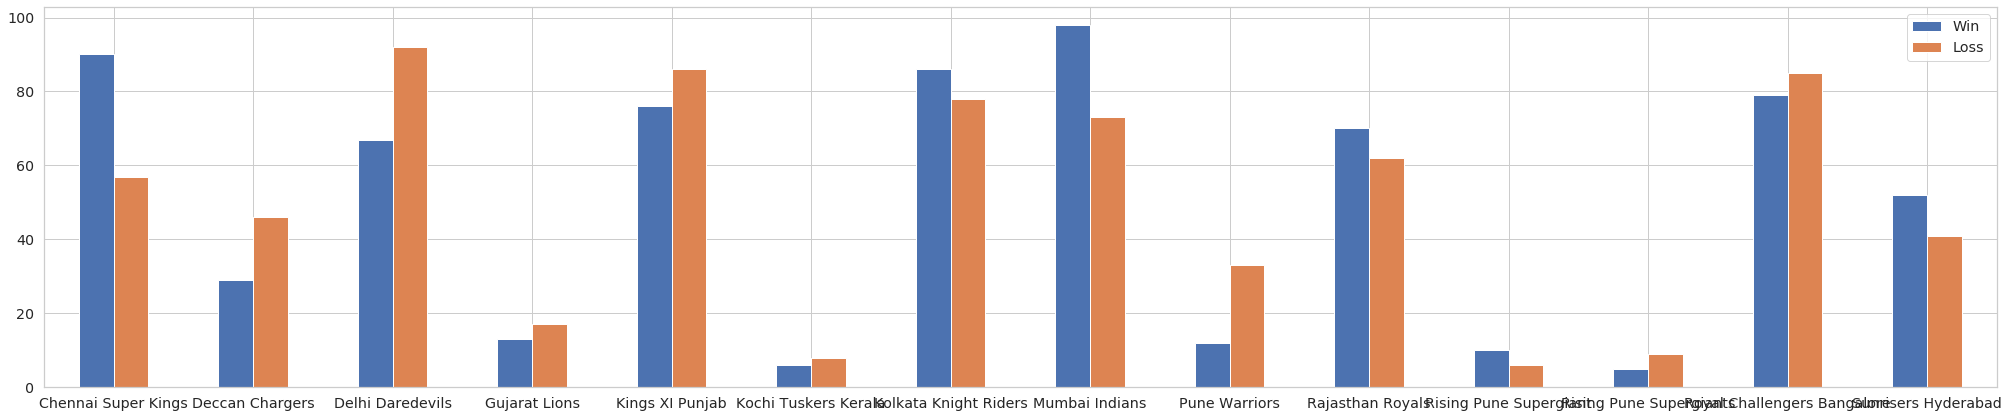

In [28]:
df = pd.DataFrame({'Win': df_ipl_data['winner'].value_counts(sort=False) ,
                   'Loss': df_ipl_data['loser'].value_counts(sort=False)}) 
df.plot.bar(rot=0,figsize=(35, 7))

**Observations:**

Only 5 out of 14 teams has more wins than losses. As expected, these also the teams which won IPL titles.

#### 5.9.2 Season-Wise

In [30]:
s = df_ipl_data.groupby('season')['winner'].value_counts(sort=True)
s.groupby(level=[0]).nlargest(1)

season  season  winner               
2008    2008    Rajasthan Royals         13
2009    2009    Delhi Daredevils         10
2010    2010    Mumbai Indians           11
2011    2011    Chennai Super Kings      11
2012    2012    Kolkata Knight Riders    12
2013    2013    Mumbai Indians           13
2014    2014    Kings XI Punjab          12
2015    2015    Chennai Super Kings      10
2016    2016    Sunrisers Hyderabad      11
2017    2017    Mumbai Indians           12
2018    2018    Chennai Super Kings      11
Name: winner, dtype: int64

**Season-2008**

In [ ]:
df_ipl_data[(df_ipl_data['season'] == 2008)]['winner'].value_counts(sort=False)

In [ ]:
df_ipl_data[(df_ipl_data['season'] == 2008)]['loser'].value_counts(sort=False)

In [ ]:
df = pd.DataFrame({'Win': df_ipl_data[(df_ipl_data['season'] == 2008)]['winner'].value_counts(sort=False) ,
                   'Loss':df_ipl_data[(df_ipl_data['season'] == 2008)]['loser'].value_counts(sort=False) }) 
df.plot.bar(rot=0,figsize=(27, 7))

**Season-2012**

In [ ]:
df = pd.DataFrame({'Win': df_ipl_data[(df_ipl_data['season'] == 2012)]['winner'].value_counts(sort=True, ascending=False) ,
                   'Loss':df_ipl_data[(df_ipl_data['season'] == 2012)]['loser'].value_counts(sort=True, ascending=False) }) 
df.plot.bar(rot=0,figsize=(27, 7))

**Season-2014**

In [ ]:
df = pd.DataFrame({'Win': df_ipl_data[(df_ipl_data['season'] == 2014)]['winner'].value_counts(sort=True, ascending=False) ,
                   'Loss':df_ipl_data[(df_ipl_data['season'] == 2014)]['loser'].value_counts(sort=True, ascending=False) }) 
df.plot.bar(rot=0,figsize=(27, 7))

**Season-2018**

In [ ]:
df = pd.DataFrame({'Win': df_ipl_data[(df_ipl_data['season'] == 2018)]['winner'].value_counts(sort=True, ascending=False) ,
                   'Loss':df_ipl_data[(df_ipl_data['season'] == 2018)]['loser'].value_counts(sort=True, ascending=False) }) 
df.plot.bar(rot=0,figsize=(27, 7))

**Observations:**

In **7 out of 11 seasons**, team that topped points table won 
IPL Title i.e **63.6%**.

# 6. Conclusion

## 6.1 Actionable Insights

1. It is  always recommended to choose fielding after winning toss.

2. Teams should work on using home conditions to their advantage.

3. If a team thinks DLS will come in to place during course of match, they should choose batting.

4. Teams should work on winning toss as there is 51 % of winning match after winning toss.

5. Try to be in top of points table.